In [ ]:
#pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 4.7 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.0 MB 3.2 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.0 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 3.1 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 2.9 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/11.0 MB 2.8 MB/s eta 0:00:02
   --------------------- ---------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [3]:
data=pd.read_csv("Iris.csv")
data = data[data["Species"].isin(['Iris-setosa', 'Iris-versicolor'])]
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})
X = data[['SepalLengthCm', 'SepalWidthCm']].values.tolist()
y = list(data['Species'])

In [4]:
print("len of X: ",len(X))
print("len of y: ",len(y))
print(X[:5])
print(y[:5])

len of X:  100
len of y:  100
[[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6]]
[0, 0, 0, 0, 0]


In [5]:
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
torch.manual_seed(42)
shuffle_indices= torch.randperm(len(y),dtype=torch.long)
X=X[shuffle_indices]
y=y[shuffle_indices]
x_train,x_test=X[:70],X[70:]
y_train,y_test=y[:70],y[70:]

In [6]:
# Standarization
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
X_train = (x_train - mu) / sigma
X_test = (x_test - mu) / sigma

In [ ]:
class model_implementation():  #Linear regression, Adaline
    def __init__(self, num_features=2):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)
    def activation(self,x):
        sigmoid=torch.tensor([1/(1+math.exp(-i)) for i in x])
        return sigmoid
    def forward(self, x):
        x_w = torch.add(torch.mm(x, self.weights), self.bias)

        # x_w=self.activation(x_w)
        return x_w.view(-1)
        
    def backward(self, x, y, y_pred):  
        
        grad_loss_y = 2*(y_pred - y) # part deri.L/ part deriv. pred_y = part. derivate/part deriv. pred_y (y - pred_y)^2   = (2/n) (y - pred_y)
        
        grad_y_weights = x
        grad_y_bias = 1
        
        grad_loss_weights =  torch.matmul(grad_y_weights.t(),grad_loss_y.view(-1, 1)) / y.size(0)  

        grad_loss_bias = torch.sum(grad_y_bias*grad_loss_y) / y.size(0)
        
        return grad_loss_weights, grad_loss_bias
    
    def mean_square_error(self,y_pred,y): 
        error=torch.mean((y_pred-y)**2)
        return error

In [ ]:
def train_linear_regression(X,y, model, epochs=10, lr=0.01):
    error_per_epoch=[]
    for e in tqdm(range(epochs)):
        y_pred=model.forward(X)
        w_grad, b_grad=model.backward(X,y,y_pred)
        model.weights-=lr*w_grad
        model.bias-=lr*b_grad #its getting subtract as the gradient loss is opposite to gradient 
        
        loss=model.mean_square_error(y_pred,y)
        error_per_epoch.append(loss)

        print(f"Epoch : {e}  ; Current loss: {loss:.2f}")
    return error_per_epoch

#******************************************************************************#

def train_adaline(X,y, model, epochs=10, lr=0.01,batch_size=8):
    torch.manual_seed(42)
    error_per_epoch=[]

    for e in range(epochs):
        shuffle_indices= torch.randperm(len(y),dtype=torch.long)
        minibatch=torch.split(shuffle_indices,batch_size)
        for n,batch_index in enumerate(minibatch):
            y_pred=model.forward(X[batch_index])
            w_grad, b_grad=model.backward(X[batch_index],y[batch_index],y_pred)
            model.weights-=lr*w_grad
            model.bias-=lr*b_grad
            batch_loss=model.mean_square_error(y_pred,y[batch_index])
            print(f"Batch {n}   loss: {batch_loss}")
        
        y_pred = model.forward(X)
        epoch_loss=model.mean_square_error(y_pred,y)
        error_per_epoch.append(epoch_loss)
        print(f"Epoch : {e}  ;  loss: {epoch_loss:.2f}")
    return error_per_epoch



In [9]:
linaer_regression = model_implementation(num_features=2)
loss = train_linear_regression(X_train, y_train,linaer_regression,epochs= 100,lr= 0.01)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch : 0  ; Current loss: 0.53
Epoch : 1  ; Current loss: 0.51
Epoch : 2  ; Current loss: 0.49
Epoch : 3  ; Current loss: 0.47
Epoch : 4  ; Current loss: 0.45
Epoch : 5  ; Current loss: 0.43
Epoch : 6  ; Current loss: 0.41
Epoch : 7  ; Current loss: 0.40
Epoch : 8  ; Current loss: 0.38


100%|██████████| 100/100 [00:00<00:00, 1425.50it/s]

Epoch : 9  ; Current loss: 0.37
Epoch : 10  ; Current loss: 0.35
Epoch : 11  ; Current loss: 0.34
Epoch : 12  ; Current loss: 0.33
Epoch : 13  ; Current loss: 0.31
Epoch : 14  ; Current loss: 0.30
Epoch : 15  ; Current loss: 0.29
Epoch : 16  ; Current loss: 0.28
Epoch : 17  ; Current loss: 0.27
Epoch : 18  ; Current loss: 0.26
Epoch : 19  ; Current loss: 0.25
Epoch : 20  ; Current loss: 0.24
Epoch : 21  ; Current loss: 0.23
Epoch : 22  ; Current loss: 0.22
Epoch : 23  ; Current loss: 0.22
Epoch : 24  ; Current loss: 0.21
Epoch : 25  ; Current loss: 0.20
Epoch : 26  ; Current loss: 0.19
Epoch : 27  ; Current loss: 0.19
Epoch : 28  ; Current loss: 0.18
Epoch : 29  ; Current loss: 0.18
Epoch : 30  ; Current loss: 0.17
Epoch : 31  ; Current loss: 0.16
Epoch : 32  ; Current loss: 0.16
Epoch : 33  ; Current loss: 0.15
Epoch : 34  ; Current loss: 0.15
Epoch : 35  ; Current loss: 0.14
Epoch : 36  ; Current loss: 0.14
Epoch : 37  ; Current loss: 0.13
Epoch : 38  ; Current loss: 0.13
Epoch : 39 

In [10]:
print("Weights: ",linaer_regression.weights)
print("bias: ",linaer_regression.bias)


Weights:  tensor([[ 0.2749],
        [-0.2654]])
bias:  tensor([0.4585])


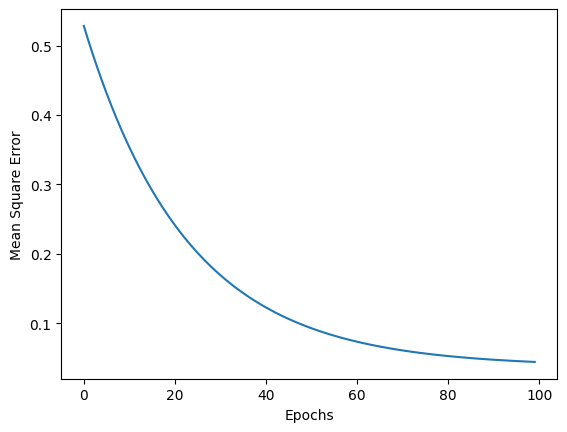

In [11]:
plt.plot(range(len(loss)), loss)
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.show()

In [12]:
train_res=linaer_regression.forward(X_train)
train_class=[1 if i>=0.5 else 0 for i in train_res]
correct_train= sum(p == t for p, t in zip(train_class, y_train))
test_results=linaer_regression.forward(X_test)
test_class=[1 if i>=0.5 else 0 for i in test_results]
correct= sum(p == t for p, t in zip(test_class, y_test))
print("Train Accuracy: ", correct_train/len(y_train) )
print("Correct : ",correct)
print("Wrong: ",len(y_test)-correct)
print("Accuracy: ", correct/len(y_test) )


Train Accuracy:  tensor(1.)
Correct :  tensor(29)
Wrong:  tensor(1)
Accuracy:  tensor(0.9667)


In [13]:
adaline = model_implementation(num_features=2)
loss = train_adaline(X_train, y_train,adaline,epochs= 100,lr= 0.01)
print("Weights: ",adaline.weights)
print("bias: ",adaline.bias)

Batch 0   loss: 0.375
Batch 1   loss: 0.24335944652557373
Batch 2   loss: 0.47701841592788696
Batch 3   loss: 0.6797854900360107
Batch 4   loss: 0.5433796644210815
Batch 5   loss: 0.5072765350341797
Batch 6   loss: 0.1981375813484192
Batch 7   loss: 0.5956450700759888
Batch 8   loss: 0.4904434382915497
Epoch : 0  ;  loss: 0.37
Batch 0   loss: 0.1477002501487732
Batch 1   loss: 0.3474617302417755
Batch 2   loss: 0.3165493309497833
Batch 3   loss: 0.37518686056137085
Batch 4   loss: 0.29849937558174133
Batch 5   loss: 0.3761729896068573
Batch 6   loss: 0.5133147835731506
Batch 7   loss: 0.20479293167591095
Batch 8   loss: 0.2551989257335663
Epoch : 1  ;  loss: 0.26
Batch 0   loss: 0.23193587362766266
Batch 1   loss: 0.22229306399822235
Batch 2   loss: 0.18441106379032135
Batch 3   loss: 0.2299230545759201
Batch 4   loss: 0.27050378918647766
Batch 5   loss: 0.05610703304409981
Batch 6   loss: 0.41338565945625305
Batch 7   loss: 0.2405271828174591
Batch 8   loss: 0.16991382837295532
Epoch 

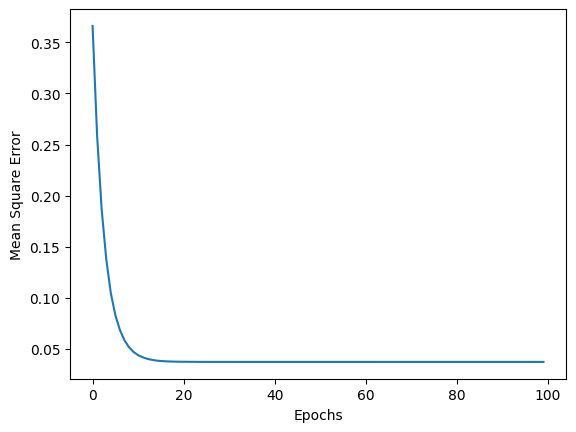

In [14]:
plt.plot(range(len(loss)), loss)
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.show()

In [96]:
train_res=adaline.forward(X_train)
train_class=[1 if i>=0.5 else 0 for i in train_res]
correct_train= sum(p == t for p, t in zip(train_class, y_train))
test_results=adaline.forward(X_test)
test_class=[1 if i>=0.5 else 0 for i in test_results]
correct= sum(p == t for p, t in zip(test_class, y_test))
print("Train Accuracy: ", correct_train.tolist()/len(y_train) )
print("Correct : ",correct.tolist())
print("Wrong: ",len(y_test)-correct.tolist())
print("Accuracy: ", correct.tolist()/len(y_test) )

Train Accuracy:  1.0
Correct :  30
Wrong:  0
Accuracy:  1.0


In [ ]:
#not working on it , just for test
# def analytical_solution(x, y):
#     Xb = torch.cat( (torch.ones((x.size(0), 1)), x), dim=1)
#     w = torch.zeros(x.size(1))
#     z = torch.inverse(torch.matmul(Xb.t(), Xb))
#     params = torch.matmul(z, torch.matmul(Xb.t(), y))
#     b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
#     return w, b

# w, b = analytical_solution(X_train, y_train)
# print('Analytical weights', w)
# print('Analytical bias', b)

# w = (X.t() . X).inverse() X.t() . y


Analytical weights tensor([[ 0.3225],
        [-0.2892]])
Analytical bias tensor([0.5286])
